![alt text](pictures/cifar10.png "CIFAR10")
# Training a Image Classifier
### New Package in this notes: <span style="color:red">torchvision</span>
http://pytorch.org/docs/torchvision/torchvision.html
#### Traing a image classifier based on CIFAR10 as the following steps:
- Load and normalizing the CIFAR10 training and test datasets using torchvision
- Define a Convolution Neural Network
- Define a loss function
- Train the network on the training data
- Test the network on the test data
---
## 1. Loading and normalizing CIFAR10

In [3]:
%matplotlib inline

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


### 使用torchvision package下载并处理数据集。
- **torchvision.transforms.Compose()**可以把多个transforms.\*()函数集合在一起。这些transforms.\*()把输入图像转换成某种格式。例如上面的代码中把transform.ToTensor()和transform.Normalize()这两个函数组合了在一起。
 - **transforms.ToTensor()**: Converts a PIL.Image or numpy.ndarray (H x W x C) in the range [0, 255] to a torch.FloatTensor of shape (C x H x W) in the range [0.0, 1.0].
 - **transforms.Normalize(mean, std)**: Given mean: (R, G, B) and std: (R, G, B), will normalize each channel of the torch.\*Tensor, i.e. channel = (channel - mean) / std. 也就是标准化图像数据。
- **torchvision.datasets.CIFAR10()**：
 - root：数据集的根目录
 - train：=True时为训练集，=False时为测试集
 - download：=True时表示从网上下载数据集到根目录下，如果已经下载过，则什么都不做。
 - transform: 指明需要的转换步骤。
- **torch.utils.data.DataLoader(dataset, batch_size=1, shuffle=False, sampler=None, num_workers=0, collate_fn=function default_collate, pin_memory=False, drop_last=False)**: 数据加载程序
 - dataset(trainset/testset)：从哪里加载数据
 - batch_size: 每一个batch中有几个样本
 - shuffle：如果时True，则在每一个epoch后打乱数据的顺序
 - num_workers: 使用几个线程载入数据。

horse  deer plane   cat


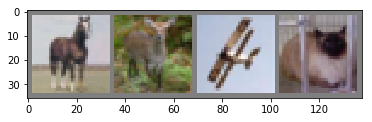

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))